<a href="https://colab.research.google.com/github/JuanM-GG/sistemas-dinamicos-Python/blob/main/STIRRED_TANK_HEATERS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tile: STIRRED TANK HEATERS

Name: Juan Manuel G.G

Date: February 2021

### Objetives

* Develop the nonlinear dynamic model of a perfectly mixed stirred tank heater

* Find the state-space and transfer funcion form of a linearized tank heater 

* Compare the dynamic responses of the nonlinear and linear models

* Use Python for linear and nonlinear simulations 

* Analyze phaseplane behavior 

### Introduction 

Mixing vessels are used in many chemical processes. Often these mixing vessels are heated, either by a coil or a jacket surrounding the vessel. For example, a mixing vessel may serve as a chemical reactor, where two or more components are reacted to produce one or more products. Often this reaction must occur at a certain temperature to achieve a desired yield. The temperature in the vessel is maintained by varying the flowrate of a fluid through the jacket or coil.

Consider a stirred tank heater as shown in Fig.l, where the tank inlet stream is received from another process unit. The objetive is to raise the temperature of the inlet stream to a desired value. A heat transfer fluid is circulated through a jacket to heat the fluid in the tank

### Process scheme 

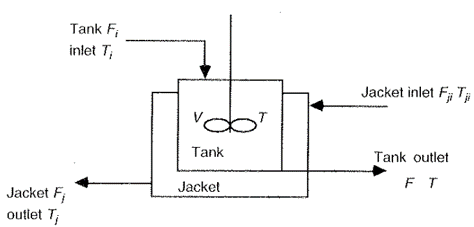

Figure 1. Tank with a heater jacket 

### Assumptions 

* The volume and liquids are constant with constant density and heat capacity 

* Perfect mixing is assumed in both the tank and jacket 

* The tank inlet flowrate, jacket flowrate, tank inlet temperature, and jacket inlet temperature may change (these are the inputs)

* The rate of heat transfer from the jacket to the tank is governed by the equation $Q = UA(T_i - T)$, where U is the overall heat transfer coefficient and A is the area for heat transfer

|Variables| Subscripts|
|:---:|:---:|
| $A$ | area for heat transfer|
| $C_p$ | heat capacity (energy/mass*temp)|
| $F$ | volumetric flowrate (volume/time)|
| $\rho$ | density (mass/volume)|
| $T$ | temperature|
| $t$ | time |
| $Q$ | rate of heat transfer (energy/time) |
| $U$ | heat transfer coefficient (energy/time*area*temp)|
| $V$ | volume |
| $i$ | inlet |
| $j$ | jacket |
| $ji$ | jacket inlet |
| ref | reference state |
| $s$ | steady-state|


### Developing the dynamic model 


#### Material balance around tank

The first step is to write a material balance around the tank, assuming constant density

$$
\frac{d(V\rho)}{dt} = F_i \rho - F \rho
$$

Also, assuming constant volume ($dVdt = 0$), we find:

$$F = F_i$$

#### Energy balance around tank 

The next step is to write an energy balance around the tank 

$$\text{acumulation} = \text{in by flow} - \text{out by flow} + \text{in by heat transfer} + \text{work done on system}$$

$$
\frac{dTE}{dt} = F \rho \bar{TE}_i - F \rho \bar{TE} + Q + W_T
$$

The next step is to neglect the kinetic and petential energy and write the total work done on the system as a combination of the shaft work and the energy added to the system to get the fluid into the tank and the energy that the system performs on the surrounding to force the fluid out

$$
\frac{dU}{dt} = F \rho \left( \bar{U}_i + \frac{P_i}{\rho_i} \right) -F \rho \left( \bar{U} + \frac{P}{\rho} \right) + Q + W_s
$$

since $H = U + PV$, we can rewrite the energy balance as: 

$$
\frac{dH}{dt} - \frac{d(PV)}{dt} = F \rho \bar{H}_i - F \rho \bar{H} + Q + W_s
$$

Note that $d(PV)/dt = VdPdt + PdVdt$, and the volume is constant. Also, the mean pressure change can be neglected since the density is constant:

$$
\frac{dH}{dt} = F \rho \bar{H}_i - F \rho \bar{H} + Q + W_s
$$

Neglecting the work done by the mixing impeller, and assuming single phase and a constant heat capacity, we find: 

$$
V \rho C_p \frac{dT}{dt} = F \rho C_p (T_i - T) + Q
$$

We must also perform a material and energy balance around the jacket and use the conecting relationship for heat transfer between the jacket and the tank 

#### Materia balance around the jacket

The material balance around the jacket is (assuming constant density):

$$
\frac{d(V_j \rho_j)}{dt} = F_{ji} \rho_j - F_j \rho_j
$$

assuming constant volume ($dV/dt = 0$), we find:

$$F_j = F_{ji}$$

#### Energy balance around the jacket 

Next, we write an energy balance around the jacket. Making the same assumptions as around the tank:

$$
\frac{dT_j}{dt} = \frac{F_j}{dt} \left( T_{ji} - T \right) + \frac{Q}{V_j \rho_j C_{pj}}
$$

We also have the relationship for heat transfer from the jacket to the tank:

$$Q = UA(T_j - T)$$

The two modeling equations for this system are: 

$$
\frac{dT}{dt} = \frac{F}{V} \left( T_i - T \right) + \frac{UA(T_j - T)}{V \rho C_p} \tag{1}
$$\\

$$
\frac{dT_j}{dt} = \frac{F_j}{V_j} \left( T_{ji} - T_j \right) - \frac{UA(T_j - T)}{V_j \rho_j C_{pj}} \tag{2}
$$



### Steady state 

Before linearizing the nonlinear model to find the state-space form, we must find the state variable values at steady-slale. The steady-state is obtained by solving the dynamic equations for dxdt = 0. 

In [2]:
import sympy as sp 

In [3]:
F, Cprho, Ti, T, UA, Tj, Fj, Cpjrhoj, Tji, Tj = sp.symbols("F, Cprho, Ti, T, UA, Tj, Fj, Cpjrhoj, Tji, Tj") 

In [4]:
eq1 = sp.Eq(F*Cprho*(Ti - T) + UA*(Tj - T), 0)
eq2 = sp.Eq(Fj*Cpjrhoj*(Tji - Tj) - UA*(Tj - T), 0)

In [5]:
sp.solve([eq1,eq2],[T,Tj])

{T: -(Cpjrhoj*Fj*Tji*UA + Cprho*F*Ti*(Cpjrhoj*Fj + UA))/(UA**2 - (Cpjrhoj*Fj + UA)*(Cprho*F + UA)),
 Tj: -(Cpjrhoj*Fj*Tji*(Cprho*F + UA) + Cprho*F*Ti*UA)/(UA**2 - (Cpjrhoj*Fj + UA)*(Cprho*F + UA))}

So, the steady state is:

$$
T_{ss} =  \frac{C_p F T_i \rho (C_{pj}F_j \rho_j + UA) + C_{pj}F_j T_{ji} UA \rho_j}{(C_p F \rho + UA)(C_{pj} F_j \rho_j + UA) - (UA)^2} \tag{3}
$$\

$$
T_{jss} =  \frac{C_p F T_i UA \rho + C_{pj}F_j T_{ji} \rho_j (C_p F \rho + UA) }{(C_p F \rho + UA)(C_{pj} F_j \rho_j + UA) - (UA)^2} \tag{4}
$$

In [6]:
def steady_state():

    Tss = (Cprhoss*Fss*Tiss*(Cpjrhojss*Fjss + UAss) + Cpjrhojss*Fjss*Tjiss*UAss)/((Cprhoss*Fss + UAss)*(Cpjrhojss*Fjss + UAss)-UAss**2)

    Tjss = (Cprhoss*Fss*Tiss*UAss + Cpjrhojss*Fjss*Tjiss*(Cprhoss*Fss + UAss))/((Cprhoss*Fss + UAss)*(Cpjrhojss*Fjss + UAss)-UAss**2)
    
    return [Tss, Tjss]

In [7]:
# nominal value for inputs
Fss = 1
Fjss = 1.5 
Tiss = 50 
Tjiss = 200 

# nominal value for parameters
Cprhoss = 61.3 
Cpjrhojss = 61.3 
UAss = 183.9
Vss = 10
Vjss = 1

In [8]:
Tss, Tjss = steady_state()
print("Tss = ", Tss, "°F")
print("Tjss = ", Tjss, "°F")

Tss =  125.0 °F
Tjss =  149.99999999999997 °F


### State-space model 

Here we linearize the nonlinear modeling equations to find the state-space form: 

$$
\mathbf{\dot{x} = A x + Bu} 
$$

$$
\mathbf{y = Cx}
$$


$$
\frac{dT}{dt} = -0.4(T-T_{ss}) + 0.3(T_j - T_{jss}) -7.5(F - F_{ss}) + 0.1(T_i - T_{iss}) \tag{5}
$$

$$
\frac{dT_j}{dt} = 3(T-T_{ss}) -4.5(T_j - T_{jss}) + 50(F_j - F_{jss}) + 1.5(T_{ji} - T_{jiss}) \tag{6}
$$

### Step responses: Linear versus nonlinear models 

In this section we will compare the step responses of the nonlinear model with those predicted by the linearized model

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [109]:
# write the two model 
def heater(s,t,u):

    # state variables 
    ## nonlinear model 
    T = s[0]
    Tj = s[1]
    ## linear model 
    Tl = s[2]
    Tlj = s[3]

    # inputs 
    F = u[0]
    Fj = u[1]
    Ti = u[2]
    Tji = u[3]

    # nonliar model
    # heat flow rate
    Q = UAss*(Tj - T)
    ## energy balance in the tank
    dTdt = F/Vss*(Ti - T) + Q/(Cprhoss*Vss)
    ## energy balance in the jacket 
    dTjdt = Fj/Vjss*(Tji - Tj) - Q/(Cpjrhojss*Vjss)

    # linear model 
    ## energy balance in the tank
    dTldt = -0.4*(Tl-Tss) + 0.3*(Tlj - Tjss) - 7.5*(F - Fss) + 0.1*(Ti - Tiss)
    ## energy balance in the jacket
    dTljdt = 3*(Tl - Tss) -4.5*(Tlj - Tjss) + 50*(Fj - Fjss) + 1.5*(Tji - Tjiss)

    return [dTdt, dTjdt, dTldt, dTljdt]

In [136]:
# integration time 
time = np.linspace(0,0.5,100)

In [137]:
# inputs 
F = np.ones(len(time))*Fss 
Fj = np.ones(len(time))*Fjss + 1
Ti = np.ones(len(time))*Tiss 
Tji = np.ones(len(time))*Tjiss

In [138]:
# vectors to save states 
T = np.ones(len(time))*Tss
Tj = np.ones(len(time))*Tjss
Tl = np.ones(len(time))*Tss
Tlj = np.ones(len(time))*Tjss

In [139]:
# initial conditions 
s = [Tss, Tjss, Tss, Tjss]

# simulate with different inputs 
for i in range(len(time)-1):

    ts = [time[i], time[i+1]]

    u = [F[i+1], Fj[i+1], Ti[i+1], Tji[i+1]]

    # solve ODEs
    out = odeint(heater, s, time, args=(u,))

    # save states 
    T[i+1] = out[-1][0]
    Tj[i+1] = out[-1][1]
    Tl[i+1] = out[-1][2]
    Tlj[i+1] = out[-1][3]

    # update initial condition 
    s = out[-1]

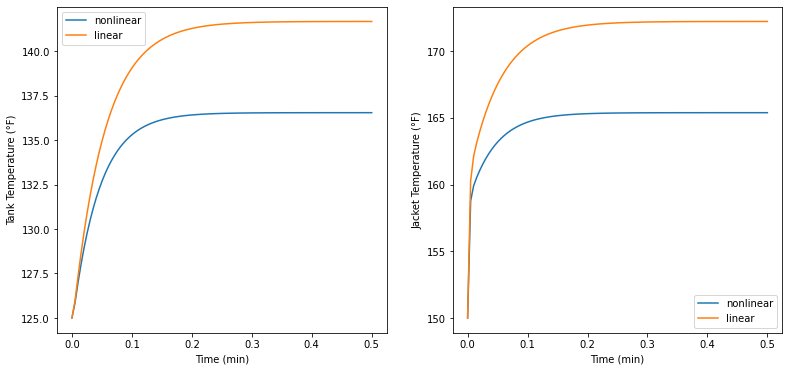

In [140]:
#@title show results
plt.figure(figsize=(13,6))
plt.subplot(1,2,1)
plt.plot(time, T, time, Tl)
plt.xlabel("Time (min)")
plt.ylabel("Tank Temperature (°F)")
plt.legend(["nonlinear","linear"])
plt.subplot(1,2,2)
plt.plot(time, Tj, time, Tlj)
plt.xlabel("Time (min)")
plt.ylabel("Jacket Temperature (°F)")
plt.legend(["nonlinear","linear"])

The gain (change in output/change in input) of the linear model is greater than the gain of the nonlinear model when the step in Fj is positive. But the gain of the linear model is smaller than the gain of the nonlinear model when the step is negative

### Unforced system responses: Perturbations in initial conditions 

The eigenvalues of the matrix A in the state-space model provide information about stability and the relative speed of response. The eigenvectors provide information about the directional dependence of the speed of response. Recall that a positive eigenvalue is unstable, while a negative eigenvalue is stable. A large magnitud eigenvalue is "faster" than a small magnitude eigenvalue. 

In [16]:
A = np.matrix([[-0.4, 0.3], [3, -4.5]])

In [17]:
eigenval, eigenvec = np.linalg.eig(A)

In [18]:
print("eigenvalues:", eigenval)

eigenvalues: [-0.1911286 -4.7088714]


In [19]:
print("eigenvectors:")
print(eigenvec)

eigenvectors:
[[ 0.82067976 -0.06945566]
 [ 0.57138843  0.99758504]]


In [20]:
s1 = [129.1035, 152.857, 129.1035, 152.857] # stady state + 5*v1
s2 = [124.6525, 154.988, 124.6525, 154.988] # stady state + 5*v2

In [ ]:
# inputs 
F = np.ones(len(time))*Fss
Fj = np.ones(len(time))*Fjss 
Ti = np.ones(len(time))*Tiss
Tji = np.ones(len(time))*Tjiss

In [30]:
# vectors to save states 
# vectors to s1
T = np.ones(len(time))*129.1035
Tj = np.ones(len(time))*152.857
Tl = np.ones(len(time))*129.1035
Tlj = np.ones(len(time))*152.857

In [33]:
# vectors to s2
T = np.ones(len(time))*124.6525
Tj = np.ones(len(time))*154.988
Tl = np.ones(len(time))*124.6525
Tlj = np.ones(len(time))*154.988

In [34]:
# initial conditions 
s = s2
# s = s2
# simulate with different inputs 
for i in range(len(time)-1):

    ts = [time[i], time[i+1]]

    u = [F[i+1], Fj[i+1], Ti[i+1], Tji[i+1]]

    # solve ODEs
    out = odeint(heater, s, time, args=(u,))

    # save states 
    T[i+1] = out[-1][0]
    Tj[i+1] = out[-1][1]
    Tl[i+1] = out[-1][2]
    Tlj[i+1] = out[-1][3]

    # update initial condition 
    s = out[-1]

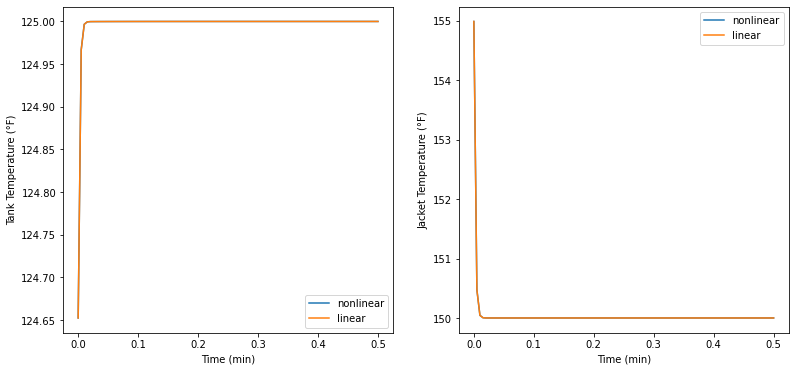

In [35]:
#@title show results
plt.figure(figsize=(13,6))
plt.subplot(1,2,1)
plt.plot(time, T, time, Tl)
plt.xlabel("Time (min)")
plt.ylabel("Tank Temperature (°F)")
plt.legend(["nonlinear","linear"])
plt.subplot(1,2,2)
plt.plot(time, Tj, time, Tlj)
plt.xlabel("Time (min)")
plt.ylabel("Jacket Temperature (°F)")
plt.legend(["nonlinear","linear"])

We can see that there is a strong dependence on the initial condition (direction) to determine how fast the steady state is reached

### Phase-Plane Behavior

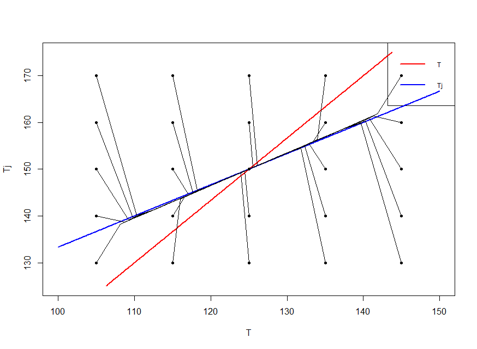

### Exercises 

1. In the heater example we performed step tests on the jacket flowrate. Perform step tests on the other inputs: (i) tank flowrate, (ii) tank inlet temperature, (iii) jackel inlet temperature

#### (i) Tank flowrate 

In [183]:
# inputs 
F = np.ones(len(time))*Fss 
F[25:50] = F[25:50] + 1
F[50:75] = F[50:75] + 0.5
Fj = np.ones(len(time))*Fjss 
Ti = np.ones(len(time))*Tiss
Tji = np.ones(len(time))*Tjiss

In [184]:
# vectors to save states 
T = np.ones(len(time))*Tss
Tj = np.ones(len(time))*Tjss
Tl = np.ones(len(time))*Tss
Tlj = np.ones(len(time))*Tjss

In [185]:
# initial conditions 
s = [Tss, Tjss, Tss, Tjss]

# simulate with different inputs 
for i in range(len(time)-1):

    ts = [time[i], time[i+1]]

    u = [F[i+1], Fj[i+1], Ti[i+1], Tji[i+1]]

    # solve ODEs
    out = odeint(heater, s, time, args=(u,))

    # save states 
    T[i+1] = out[-1][0]
    Tj[i+1] = out[-1][1]
    Tl[i+1] = out[-1][2]
    Tlj[i+1] = out[-1][3]

    # update initial condition 
    s = out[-1]

Text(0, 0.5, 'tank inflow')

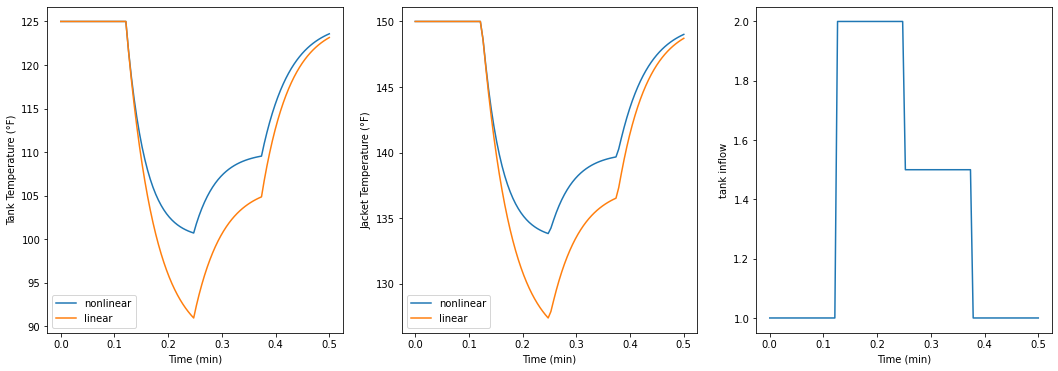

In [186]:
#@title show results
plt.figure(figsize=(18,6))
plt.subplot(1,3,1)
plt.plot(time, T, time, Tl)
plt.xlabel("Time (min)")
plt.ylabel("Tank Temperature (°F)")
plt.legend(["nonlinear","linear"])
plt.subplot(1,3,2)
plt.plot(time, Tj, time, Tlj)
plt.xlabel("Time (min)")
plt.ylabel("Jacket Temperature (°F)")
plt.legend(["nonlinear","linear"])
plt.subplot(1,3,3)
plt.plot(time, F)
plt.xlabel("Time (min)")
plt.ylabel("tank inflow")

The gain is bigger in the linear system when the step is positive and smaller when it is negative 

### (i) Tank and jacket inlet temperatures 

In [191]:
# inputs 
F = np.ones(len(time))*Fss 
Fj = np.ones(len(time))*Fjss 
Ti = np.ones(len(time))*Tiss 
Ti[25:50] = Ti[25:50] + 50
Ti[50:75] = Ti[50:75] + 25
Tji = np.ones(len(time))*Tjiss #- 150

In [192]:
# vectors to save states 
T = np.ones(len(time))*Tss 
Tj = np.ones(len(time))*Tjss
Tl = np.ones(len(time))*Tss
Tlj = np.ones(len(time))*Tjss

In [193]:
# initial conditions 
s = [Tss, Tjss, Tss, Tjss]

# simulate with different inputs 
for i in range(len(time)-1):

    ts = [time[i], time[i+1]]

    u = [F[i+1], Fj[i+1], Ti[i+1], Tji[i+1]]

    # solve ODEs
    out = odeint(heater, s, time, args=(u,))

    # save states 
    T[i+1] = out[-1][0]
    Tj[i+1] = out[-1][1]
    Tl[i+1] = out[-1][2]
    Tlj[i+1] = out[-1][3]

    # update initial condition 
    s = out[-1]

Text(0, 0.5, 'tank inlet temperature (K)')

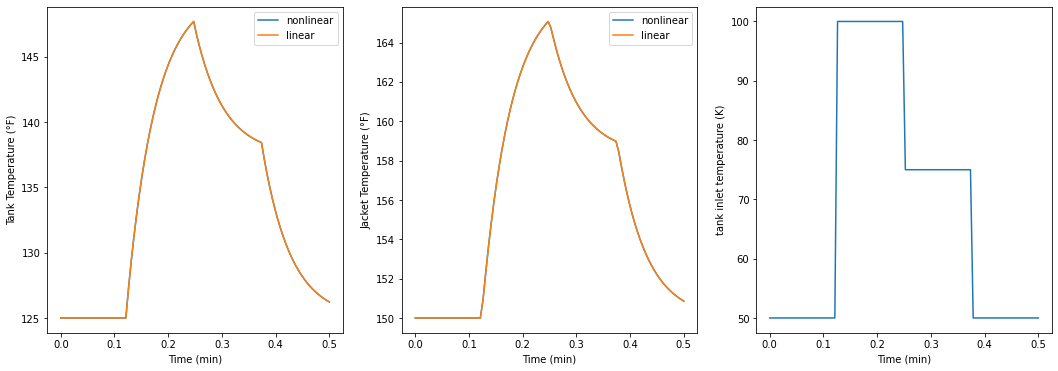

In [194]:
#@title show results
plt.figure(figsize=(18,6))
plt.subplot(1,3,1)
plt.plot(time, T, time, Tl)
plt.xlabel("Time (min)")
plt.ylabel("Tank Temperature (°F)")
plt.legend(["nonlinear","linear"])
plt.subplot(1,3,2)
plt.plot(time, Tj, time, Tlj)
plt.xlabel("Time (min)")
plt.ylabel("Jacket Temperature (°F)")
plt.legend(["nonlinear","linear"])
plt.subplot(1,3,3)
plt.plot(time, Ti)
plt.xlabel("Time (min)")
plt.ylabel("tank inlet temperature (K)")

La temperatura en la entrada no genera una discrepancia entre el modelo no lineal y el modelo lineal


2. Find the nonlinear steady-stae relationships between jacket flowrate and the two temperatures (tank and jacket). Plot the input (jacket flowrate) versus the outputs for the physical parameters given. Discuss how the gain changes with coolant
flowrate

In [212]:
def Tss_Tjss(Fj):

    Tss = (Cprhoss*Fss*Tiss*(Cpjrhojss*Fj + UAss) + Cpjrhojss*Fj*Tjiss*UAss)/((Cprhoss*Fss + UAss)*(Cpjrhojss*Fj + UAss)-UAss**2)

    Tjss = (Cprhoss*Fss*Tiss*UAss + Cpjrhojss*Fj*Tjiss*(Cprhoss*Fss + UAss))/((Cprhoss*Fss + UAss)*(Cpjrhojss*Fj + UAss)-UAss**2)
    
    return [Tss, Tjss]

In [213]:
Fj = np.linspace(0.01,10,100)

In [214]:
Temp = Tss_Tjss(Fj)

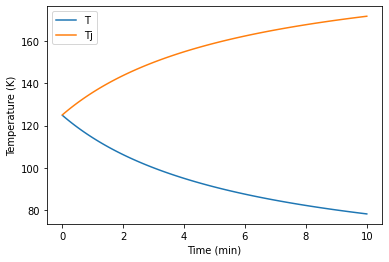

In [215]:
plt.plot(Fss, Temp[0], Fss, Temp[1])
plt.xlabel("Time (min)")
plt.ylabel("Temperature (K)")
plt.legend(["T","Tj"])

In [218]:
Tjiss

200

Wr can see that when Fj increses the jacket temperature in the steady state increases too. This has sense because we can infer that in the extreme case where the jacket inflow is too big the temperature in the steady state will be equal to the temperature in the inflow, which is 200 °F

For me, it has no sense that the tank temperature drecreases when jacket inflow increases. It should increase too 